# Using Artificial Neural Networks for Regression in Python

# The business meaning of each column in the data is as below

Price: The Price of the car in dollars
Age: The age of the car in months
KM: How many KMS did the car was used
HP: Horsepower of the car
MetColor: Whether the car has a metallic color or not
CC: The engine size of the car
Doors: The number of doors in the car
Weight: The weight of the car
Create an ML model which can predict the apt price of a second-hand car.

# Defining the problem statement:
Target Variable: Price
Predictors: Age, KM, CC, etc.

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)


CarPricesDataNumeric=pd.read_pickle('CarPricesData.pkl')
CarPricesDataNumeric.head()

# Splitting the Data into Training and Testing
We don’t use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Testing data.

In this same step, we are standardizing the data as well. This is important for Neural Networks because it improves the model training speed and helps to find global minima.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!The term kernel_initializer is a fancy term
# for which statistical distribution or function to use for initialising the weights
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
#Adam Optimizer is a technique that reduces the time taken to train a model in Deep Learning.
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
#verbose = 1, which includes both progress bar and one line per epoch

#verbose = 0, means silent

# one line per epoch i.e. epoch no./total no. of epochs
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
51/51 [==============================] - 1s 4ms/step - loss: 0.9822
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.9303
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.7306
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4749
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.3161
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.2465
Epoch 7/50
51/51 [==============================] - 0s 4ms/step - loss: 0.2091
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1858
Epoch 9/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1709
Epoch 10/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1615
Epoch 11/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1559
Epoch 12/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1527
Epoch 13/50
51/51 [==============================

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 5)                 40        
                                                                 
 dense_52 (Dense)            (None, 5)                 30        
                                                                 
 dense_53 (Dense)            (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Finding best set of parameters using manual grid search
This is a simple for loop based approach. You can easily edit this and adapt it for more hyperparameters by simply adding another nested for-loop.

In [ ]:
#Finding best set of parameters using manual grid search
This is a simple for loop based approach. You can easily edit this
and adapt it for more hyperparameters by simply adding another nested for-loop.

SyntaxError: invalid syntax (<ipython-input-5-690197fbcfba>, line 2)

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

14/14 [==============================] - 0s 4ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 33.873892051002954


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 4ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 46.1959716678015


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 3ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 61.73034673974367


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 3ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 51.10783673783828


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 3ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 35.40996338539654


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 43.59119430465386


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 4ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 46.88621399524242


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 3ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 62.85231713742331


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 3ms/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 49.58383765444802


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 3ms/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 39.690071354012844


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 3ms/step
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 52.978502348722266


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 5ms/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 52.85177124456166


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 4ms/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 34.524963096007085


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 35.35498494601329


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 57.33060244514576


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 62.44909796619135


<ipython-input-11-e2880ef29af5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<Axes: xlabel='Parameters'>

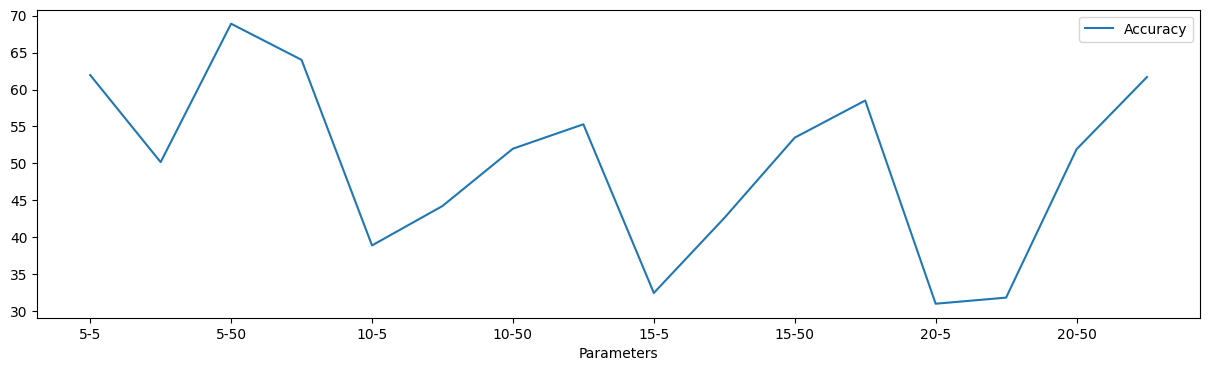

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 [==============================] - 0s 3ms/step


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9788.834961
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9834.092773
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8785.431641
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9223.875977
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8935.146484


In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 90.86619564963699


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9788.834961,1.619749
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9834.092773,23.003037
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8785.431641,17.139089
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9223.875977,7.297729
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8935.146484,0.165961


In [ ]:
# Function to generate Deep ANN model
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel,
                         param_grid=Parameter_Trials,
                         scoring=custom_Scoring,
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

ModuleNotFoundError: No module named 'keras.wrappers'